# 解析 wrk 的输出

In [12]:
import os
import json
import re
from collections import defaultdict
from ast import literal_eval

import pandas as pd

In [6]:
file = "./result1.txt"

with open(file, "r", encoding="utf8") as f:
    lines = f.readlines()

print(len(lines))

106


In [21]:
def convert_percentage(percentage: str):
    percentage = percentage.replace("%", "").strip()
    return round(literal_eval(percentage) / 100, 5)

def convert_latency(latency: str):
    latency = latency.strip()
    if latency.endswith("ms"):
        latency = latency[:-2]
        latency = float(latency)
    elif latency.endswith("s"):
        latency = latency[:-1]
        latency = float(latency) * 1000
    else:
        # 默认是 ms
        latency = float(latency)
    return latency


In [50]:
def parse_latency_istribution(lines):
    # 解析总体的 Latency Distribution
    data_list = []
    flag = False
    for line in lines:
        if flag:
            split = line.strip().split()
            if len(split) == 2:
                percentage, latency = split
                percentage = convert_percentage(percentage)
                latency = convert_latency(latency)
                # print(percentage, latency)
                data_list.append({
                    "percentage": percentage,
                    "latency": latency,
                })

        if "Latency Distribution" in line:
            flag = True
        if line.strip() == "":
            flag = False
    return data_list

In [51]:
data_list = parse_latency_istribution(lines)
df = pd.DataFrame(data_list)
df

,percentage,latency
0,0.50000,2.77
1,0.75000,3.52
2,0.90000,5.81
3,0.99000,26.01
4,0.99900,52.16
5,0.99990,58.05
6,0.99999,61.38
7,1.00000,61.38


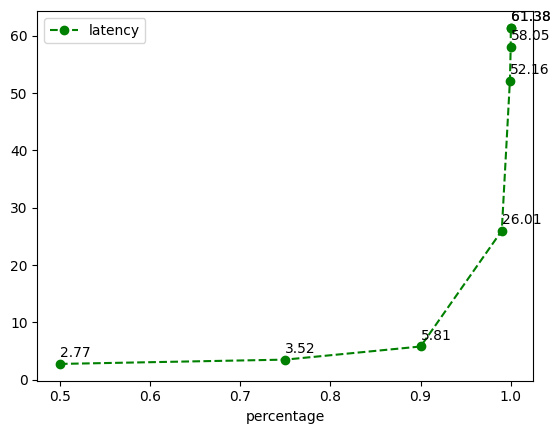

In [52]:
ax = df.plot.line(x="percentage", y="latency", color="green", marker="o", linestyle="--")

# 在折线图上显示每个点的数值
for x, y in zip(df["percentage"], df["latency"]):
    ax.annotate(str(y), xy=(x, y), xytext=(0, 5), textcoords="offset points")

import matplotlib.pyplot as plt
plt.show()

In [53]:
def parse_detail_latency_istribution(lines):
    """
    解析更详细的时延信息
    """
    # 解析总体的 Latency Distribution
    data_list = []
    flag = False
    for line in lines:
        if flag:
            split = line.strip().split()
            if len(split) == 4:
                latency, percentage, count, _ = split
                percentage = literal_eval(percentage)
                latency = literal_eval(latency)
                # print(percentage, latency)
                data_list.append({
                    "percentage": percentage,
                    "latency": latency,
                    "count": count,
                })

        if "Value   Percentile   TotalCount" in line:
            flag = True
        if "#[Mean" in line:
            flag = False
    return data_list

In [56]:
data_list = parse_detail_latency_istribution(lines)
df = pd.DataFrame(data_list)
df

,percentage,latency,count
0,0.000000,0.454,1
1,0.100000,1.673,3950
2,0.200000,2.028,7902
3,0.300000,2.301,11881
4,0.400000,2.543,15830
...,...,...,...
74,0.999963,60.127,39494
75,0.999969,60.127,39494
76,0.999973,60.127,39494
77,0.999976,61.375,39495


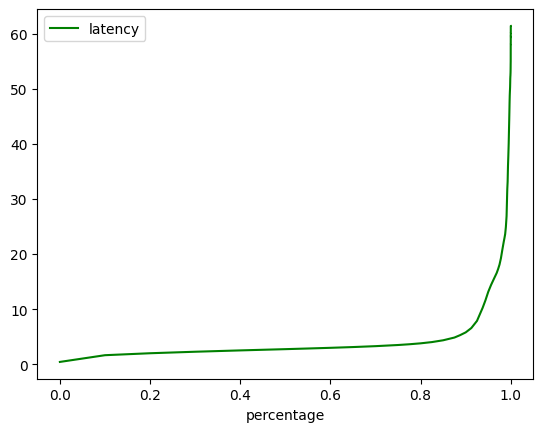

In [65]:
ax = df.plot.line(x="percentage", y="latency", color="green", linestyle="-")